# Gennaio 2018
## Esercizio 0
### 0.1
La media campionaria è uno stimatore non distorto per $\mu$?
$E(X) = \mu$

$$E(\overline{X}) = \frac{1}{n}\displaystyle \sum_{i=1}^n E(X_i) = \frac{n}{n}E(X) = E(X)$$

### 0.2

Grafico delle funzioni di ripartizione?

### 0.3
$X \sim Expon(\lambda)$

$E(X) = \frac{1}{\lambda}$ quindi $$\lambda = \frac{1}{E(X)}$$

### 0.4
$Var(X) = \frac{1}{\lambda^2} = E(X)^2$

Deviazione standard = $\sqrt{Var(X)} = E(X)$

### 0.5
L'esponenziale B ha il parametro con valore più alto  perchè per p più alto $F_X$ è maggiore (vedi punto 2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
from scipy.stats import expon
from scipy.stats import geom

### Esercizio 1

In [2]:
dati = pd.read_csv("astici.csv",delimiter=",",decimal=".")
dati.columns

Index(['kg.di.pesce', 'settore.di.pesca', 'forza.del.mare', 'peso.astice'], dtype='object')

### 1.1

In [3]:
len(dati)

281

### 1.2

In [4]:
len(dati['settore.di.pesca'].unique())

9

### 1.3

In [5]:
len(dati[dati['settore.di.pesca'] == 'A'])

37

### 1.4

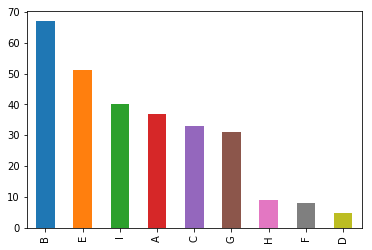

In [6]:
dati['settore.di.pesca'].value_counts().plot.bar()
plt.show()

### 1.5
Settore B

### 1.6

In [7]:
p = len(dati[dati['settore.di.pesca'] == "B"])/len(dati)
p * 100

23.843416370106763

### 1.7

In [8]:
dati['forza.del.mare'].head()
#CATEGORICO

0    9
1    9
2    9
3    7
4    8
Name: forza.del.mare, dtype: int64

### 1.8

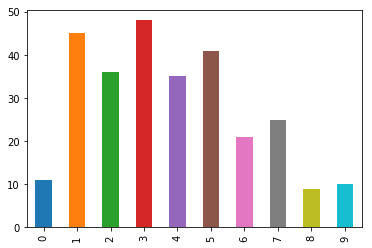

In [9]:
dati['forza.del.mare'].value_counts().sort_index().plot.bar()
plt.show()

### 1.9

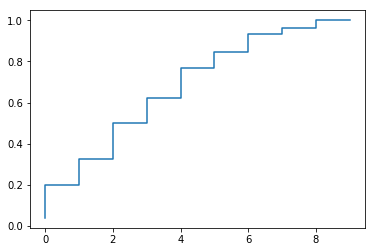

In [10]:
#1.9
ecdf = sm.distributions.ECDF(dati['forza.del.mare'])
x = np.arange(dati['forza.del.mare'].min(), dati['forza.del.mare'].max()+1)
y = ecdf(x)
plt.step(x,y)
plt.show()

### 1.10

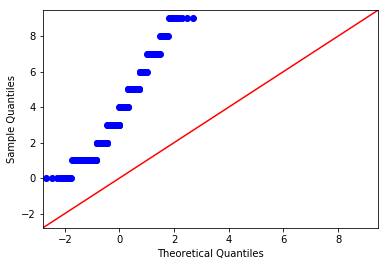

In [11]:
sm.qqplot(dati['forza.del.mare'],line="45")
plt.show()

Il Q-Q Plot è la rappresentazione grafica dei quantili di una distribuzione. Confronta la distribuzione cumulata della variabile osservata con la distribuzione cumulata della normale. Se la variabile osservata presenta una distribuzione normale, i punti di questa distribuzione congiunta si addensano sulla diagonale che va dal basso verso l'alto e da sinistra verso destra. In questo caso i punti non si distribuiscono su questa diagonale e quindi possiamo affermare che non è approssimativamente normale.

### 1.11

In [12]:
dati['forza.del.mare'].mean()

3.804270462633452

### 1.12

In [13]:
dati['forza.del.mare'].mode()

0    3
dtype: int64

Il valore della forza del mare riscontrato più spesso è stato il 3.

### 1.13

In [14]:
dati['peso.astice'].head()
#QUANTITATIVO CONTINUO

0    29.9
1    29.3
2    29.9
3    29.9
4    28.4
Name: peso.astice, dtype: float64

### 1.14

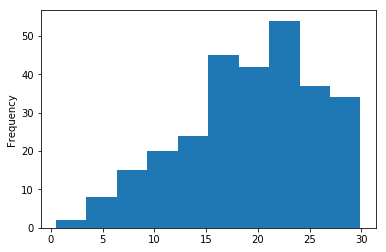

In [15]:
#1.14 QUANTITATIVO CONTINUO -> HIST?
dati['peso.astice'].plot.hist()
plt.show()

### 1.15

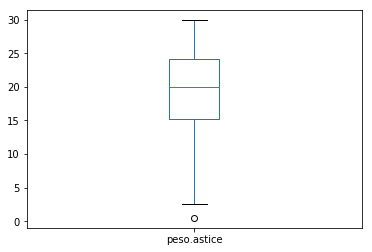

In [16]:
#EVIDENZIARE GLI OUTLIER
dati['peso.astice'].plot.box()
plt.show()

### 1.16

In [17]:
astici_filtrato = dati[dati['peso.astice'] != dati['peso.astice'].min()]

### 1.17

In [18]:
print(astici_filtrato['peso.astice'].var(),astici_filtrato['peso.astice'].mean())

40.49094930875574 19.354285714285737


### 1.18
$$P(|X-E(X)| < 10)$$
$$2\Phi(\frac{10 \sqrt{n}}{\sigma})-1$$

In [19]:
import math
n = len(astici_filtrato['peso.astice'])
X = st.norm()
sigma = astici_filtrato['peso.astice'].std()
pi = (10*math.sqrt(n))/sigma
2*X.cdf(pi)-1

1.0

### 1.19

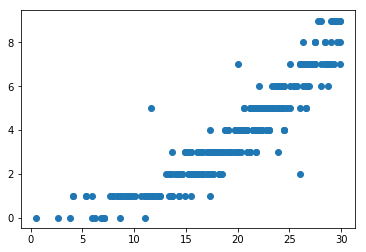

In [20]:
#RELAZIONE TRA peso.astice e forza.del.mare
plt.scatter(dati['peso.astice'],dati['forza.del.mare'])
plt.show()

In questo grafico è evidente una relazione tra i due caratteri. La relazione evidenziata è lineare positiva.

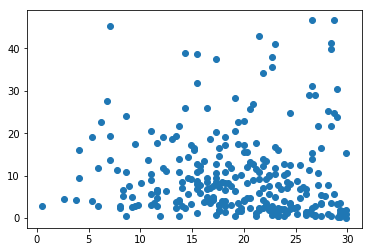

In [21]:
#RELAZIONE TRA peso.astice e kg.di.pesce.
plt.scatter(dati['peso.astice'],dati['kg.di.pesce'])
plt.show()

In questo grafico invece non si evidenzia nessun tipo di relazione tra i duie caratteri in quanto i puntini sono tutti sparsi.

### 1.20

In [22]:
#INDICE CHE INDICA LA RELAZIONE: INDICE DI CORRELAZIONE
dati["peso.astice"].corr(dati["forza.del.mare"])

0.9156381240896676

### Esercizio 2

### 2.1

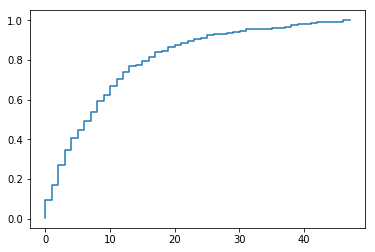

In [23]:
#FUNZIONE CUMULATIVA EMPIRICA
ecdf = sm.distributions.ECDF(dati['kg.di.pesce'])
x = np.arange(dati['kg.di.pesce'].min(), dati['kg.di.pesce'].max()+1)
y = ecdf(x)
plt.step(x,y)
plt.show()

### 2.2

In [24]:
dati['kg.di.pesce'].var()/len(dati)

0.346324073964187

In [25]:
dati['kg.di.pesce'].mean()

10.078838086708181

### 2.3
La media campionaria è sempre uno stimatore non deviato, mentre la varianza bisogna verificare

### 2.4

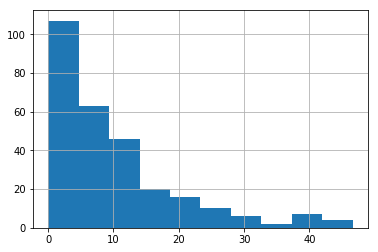

In [26]:
dati['kg.di.pesce'].hist()
plt.show()

Il grafico appena proposto suggerisce che kg.di.pesce potrebbe distribuirsi come un esponenziale in quanto il grafico approssima molto bene quello della distribuzione esponenziale. Poi sappiamo che nell'aponenziale il valore atteso a le deviazione standard si equivalgono e anche in questo caso se stimo i due valori sono molto vicini tra di loro.

In [27]:
dati["kg.di.pesce"].describe()

count    281.000000
mean      10.078838
std        9.864941
min        0.020205
25%        2.886564
50%        7.182464
75%       13.533704
max       46.633104
Name: kg.di.pesce, dtype: float64

### 2.5
$\lambda = \frac{1}{E(X)}$ 

In [28]:
1/(dati["kg.di.pesce"].mean())

0.09921778595875896